In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [56]:

dataset=pd.read_csv("http://bit.ly/w-data")

dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Checking for any null values

In [58]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [59]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
dataset.shape

(25, 2)

In [29]:
X=dataset.iloc[:,:-1].values

In [30]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [37]:
Y=dataset.iloc[:,1].values

In [38]:
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


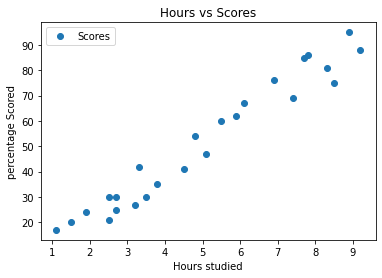

In [40]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.xlabel('Hours studied')
plt.ylabel('percentage Scored')
plt.title('Hours vs Scores')
plt.show()

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

print("trainning complete")

trainning complete


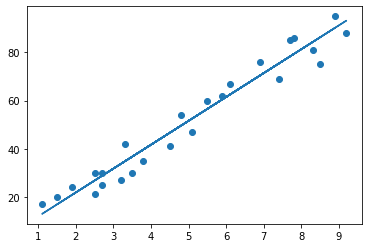

In [42]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,Y)
plt.plot(X, line)
plt.show()

In [43]:
Y_pred = regressor.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [50]:
df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [52]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982


**We can also test with our own data**

In [65]:
hours=8.34
own_pred=regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 8.34
Predicted Score = 84.67303508999095
